In [1]:
import numpy as np

In [2]:
X=np.array([2,4,6,8])
Y=np.array([81,93,91,97])

In [22]:
n=len(X)
n

4

## 단순선형회귀모형을 예측하기 위해 최소제곱법 적용

In [6]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

XY_squared_sum = 0
for i,j in zip(X,Y):
    XY_squared_sum += (i-X_mean)*(j-Y_mean)
    
X_squared_sum = 0
for i in X:
    X_squared_sum += (i - X_mean)**2
        
b = XY_squared_sum / X_squared_sum
a = Y_mean - b*X_mean

print("predicted linear model is 'Y = "+ str(a) + " + "+str(b)+"X'")

predicted linear model is 'Y = 79.0 + 2.3X'


In [15]:
# 그래프 그려주는 라이브러리 + 그래프에 한글이 나올 수 있도록 만들어주는 라이브러리를 import함 
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

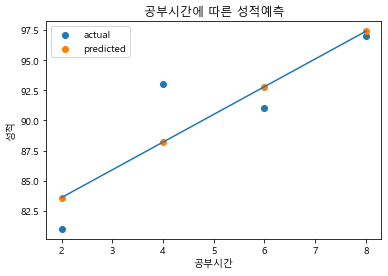

In [16]:
plt.scatter(X,Y,label = 'actual')

predict_list=[]
for i in X:
    predicted_Y = a + b*i
    predict_list.append(predicted_Y)
plt.scatter(X,predict_list,label = 'predicted')
plt.plot(X,predict_list)
plt.xlabel("공부시간")
plt.ylabel("성적")
plt.title('공부시간에 따른 성적예측')
plt.legend()
plt.show()

In [19]:
predict_list

[83.6, 88.2, 92.8, 97.4]

In [20]:
def mse(pred,actual):
    sse = 0
    for i,j in zip(pred,actual):
        sse+=(i-j)**2
    mse = sse /(len(pred) - 2)
    return mse

mse(predict_list,Y)

16.59999999999997

## 경사하강법과 관련된 코드 짜보기

In [58]:
# 이차함수 지정   y = 2(x-3)^2  + 3
def twos(x):
    return 2*(x-3)**2 + 3

# 위 이차함수의 도함수 지정 (미분된 함수)
def diff_twos(x):
    return 4*(x-3)

# x의 초기값을 설정
initial_x = 6

# 학습률 지정
lr = 0.2

# 반복횟수 초기값 지정
epoch = 0

# 실제로 x값이 3일 때 y가 최솟값 3을 가짐.
# 실제 최솟값 3과 경사하강법을 통해 구해진 y좌표 사이의 차이가 0.001 이하가 
# 되기 전까지 경사하강법 적용

# x값 리스트, y값 리스트를 만듬  >> 이 리스트에 담긴 데이터들로 그래프를 그리기 위해서 만듬.
x_list=[initial_x]
y_list=[twos(initial_x)]

while True:
    modified_x_value = initial_x - lr * diff_twos(initial_x)            # 경사하강법을 통해 x값 변경
    
    modified_y_value = twos(modified_x_value)                           # 변경된 x값에 대응되는 y값으로 변경
    
    epoch+=1                                                            # 반복 횟수 추가
    
    x_list.append(modified_x_value)                                     # 변경된 x,y 값들을 리스트 내의 원소로 추가
    y_list.append(modified_y_value)
    
    print("x is "+str(modified_x_value))
    print("y is "+str(modified_y_value))
    print("현재까지 반복횟수 : "+ str(epoch))
    
    
    # 변경된 y값과, y의 실제 최솟값 간의 차이가 0.001 이하이면 x,y의 최종값을 출력하고 while반복문 종료
    if twos(modified_x_value) - 3<=0.001:                               
        print('\n')
        print("final cooridate : x >> " + str(modified_x_value))
        print("                  y >> " + str(modified_y_value))
        print("총 반복횟수 : "+str(epoch))
        break
        
    # 변경된 y값과, y의 실제 최솟값 간의 차이가 0.001보다 크면, 변경된 x값을 initial_x 변수에 재할당
    initial_x = modified_x_value
    print('\n')

x is 3.5999999999999996
y is 3.7199999999999993
현재까지 반복횟수 : 1


x is 3.12
y is 3.0288
현재까지 반복횟수 : 2


x is 3.024
y is 3.001152
현재까지 반복횟수 : 3


x is 3.0048
y is 3.00004608
현재까지 반복횟수 : 4


final cooridate : x >> 3.0048
                  y >> 3.00004608
총 반복횟수 : 4


## 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델

In [61]:
!pip install tensorflow

Epoch 1/2000
1/1 [==============================] - 0s 175ms/step - loss: 7047.2949
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 1872.0417
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 1106.5530
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 988.7830
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 966.1813
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 957.5917
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 951.0945
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 944.9385
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 938.8661
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 932.8395
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 926.8530
Epoch 12/2000
1/1 [==============================] - 0s 2ms/step - loss: 920.9053
Epoch 13/2000
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 523.5483
Epoch 101/2000
1/1 [==============================] - 0s 3ms/step - loss: 520.2122
Epoch 102/2000
1/1 [==============================] - 0s 1ms/step - loss: 516.8975
Epoch 103/2000
1/1 [==============================] - 0s 1000us/step - loss: 513.6044
Epoch 104/2000
1/1 [==============================] - 0s 2ms/step - loss: 510.3324
Epoch 105/2000
1/1 [==============================] - 0s 1ms/step - loss: 507.0818
Epoch 106/2000
1/1 [==============================] - 0s 2ms/step - loss: 503.8522
Epoch 107/2000
1/1 [==============================] - 0s 999us/step - loss: 500.6435
Epoch 108/2000
1/1 [==============================] - 0s 1ms/step - loss: 497.4555
Epoch 109/2000
1/1 [==============================] - 0s 1ms/step - loss: 494.2881
Epoch 110/2000
1/1 [==============================] - 0s 2ms/step - loss: 491.1415
Epoch 111/2000
1/1 [==============================] - 0s 2ms/step - loss: 488.0151
Epoch 112/2000

1/1 [==============================] - 0s 999us/step - loss: 280.9077
Epoch 199/2000
1/1 [==============================] - 0s 2ms/step - loss: 279.1425
Epoch 200/2000
1/1 [==============================] - 0s 2ms/step - loss: 277.3889
Epoch 201/2000
1/1 [==============================] - 0s 1ms/step - loss: 275.6465
Epoch 202/2000
1/1 [==============================] - 0s 1ms/step - loss: 273.9154
Epoch 203/2000
1/1 [==============================] - 0s 1ms/step - loss: 272.1955
Epoch 204/2000
1/1 [==============================] - 0s 1000us/step - loss: 270.4868
Epoch 205/2000
1/1 [==============================] - 0s 1000us/step - loss: 268.7891
Epoch 206/2000
1/1 [==============================] - 0s 1ms/step - loss: 267.1025
Epoch 207/2000
1/1 [==============================] - 0s 2ms/step - loss: 265.4268
Epoch 208/2000
1/1 [==============================] - 0s 1ms/step - loss: 263.7618
Epoch 209/2000
1/1 [==============================] - 0s 999us/step - loss: 262.1078
Epoch 210

1/1 [==============================] - 0s 1000us/step - loss: 153.4713
Epoch 296/2000
1/1 [==============================] - 0s 1ms/step - loss: 152.5314
Epoch 297/2000
1/1 [==============================] - 0s 2ms/step - loss: 151.5975
Epoch 298/2000
1/1 [==============================] - 0s 1ms/step - loss: 150.6696
Epoch 299/2000
1/1 [==============================] - 0s 2ms/step - loss: 149.7477
Epoch 300/2000
1/1 [==============================] - 0s 1000us/step - loss: 148.8319
Epoch 301/2000
1/1 [==============================] - 0s 2ms/step - loss: 147.9219
Epoch 302/2000
1/1 [==============================] - 0s 1000us/step - loss: 147.0179
Epoch 303/2000
1/1 [==============================] - 0s 1000us/step - loss: 146.1197
Epoch 304/2000
1/1 [==============================] - 0s 2ms/step - loss: 145.2273
Epoch 305/2000
1/1 [==============================] - 0s 2ms/step - loss: 144.3407
Epoch 306/2000
1/1 [==============================] - 0s 1000us/step - loss: 143.4599
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 85.6079
Epoch 393/2000
1/1 [==============================] - 0s 1ms/step - loss: 85.1073
Epoch 394/2000
1/1 [==============================] - 0s 2ms/step - loss: 84.6099
Epoch 395/2000
1/1 [==============================] - 0s 597us/step - loss: 84.1159
Epoch 396/2000
1/1 [==============================] - 0s 1ms/step - loss: 83.6249
Epoch 397/2000
1/1 [==============================] - 0s 1ms/step - loss: 83.1373
Epoch 398/2000
1/1 [==============================] - 0s 2ms/step - loss: 82.6527
Epoch 399/2000
1/1 [==============================] - 0s 1ms/step - loss: 82.1712
Epoch 400/2000
1/1 [==============================] - 0s 2ms/step - loss: 81.6930
Epoch 401/2000
1/1 [==============================] - 0s 1ms/step - loss: 81.2177
Epoch 402/2000
1/1 [==============================] - 0s 607us/step - loss: 80.7455
Epoch 403/2000
1/1 [==============================] - 0s 2ms/step - loss: 80.2765
Epoch 404/2000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 48.9373
Epoch 492/2000
1/1 [==============================] - 0s 2ms/step - loss: 48.6741
Epoch 493/2000
1/1 [==============================] - 0s 1ms/step - loss: 48.4127
Epoch 494/2000
1/1 [==============================] - 0s 1ms/step - loss: 48.1530
Epoch 495/2000
1/1 [==============================] - 0s 1ms/step - loss: 47.8949
Epoch 496/2000
1/1 [==============================] - 0s 2ms/step - loss: 47.6386
Epoch 497/2000
1/1 [==============================] - 0s 2ms/step - loss: 47.3838
Epoch 498/2000
1/1 [==============================] - 0s 1ms/step - loss: 47.1308
Epoch 499/2000
1/1 [==============================] - 0s 2ms/step - loss: 46.8794
Epoch 500/2000
1/1 [==============================] - 0s 1ms/step - loss: 46.6296
Epoch 501/2000
1/1 [==============================] - 0s 1000us/step - loss: 46.3814
Epoch 502/2000
1/1 [==============================] - 0s 2ms/step - loss: 46.1348
Epoch 503/2000
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 29.6611
Epoch 591/2000
1/1 [==============================] - 0s 1ms/step - loss: 29.5227
Epoch 592/2000
1/1 [==============================] - 0s 526us/step - loss: 29.3853
Epoch 593/2000
1/1 [==============================] - 0s 1ms/step - loss: 29.2488
Epoch 594/2000
1/1 [==============================] - 0s 1ms/step - loss: 29.1132
Epoch 595/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.9784
Epoch 596/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.8445
Epoch 597/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.7115
Epoch 598/2000
1/1 [==============================] - 0s 2ms/step - loss: 28.5794
Epoch 599/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.4480
Epoch 600/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.3176
Epoch 601/2000
1/1 [==============================] - 0s 1ms/step - loss: 28.1879
Epoch 602/2000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 19.5284
Epoch 690/2000
1/1 [==============================] - 0s 1000us/step - loss: 19.4558
Epoch 691/2000
1/1 [==============================] - 0s 1000us/step - loss: 19.3835
Epoch 692/2000
1/1 [==============================] - 0s 999us/step - loss: 19.3117
Epoch 693/2000
1/1 [==============================] - 0s 1000us/step - loss: 19.2404
Epoch 694/2000
1/1 [==============================] - 0s 2ms/step - loss: 19.1696
Epoch 695/2000
1/1 [==============================] - 0s 1000us/step - loss: 19.0992
Epoch 696/2000
1/1 [==============================] - 0s 2ms/step - loss: 19.0293
Epoch 697/2000
1/1 [==============================] - 0s 1000us/step - loss: 18.9598
Epoch 698/2000
1/1 [==============================] - 0s 1ms/step - loss: 18.8908
Epoch 699/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.8222
Epoch 700/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.7541
Epoch 701/2000

Epoch 788/2000
1/1 [==============================] - 0s 1000us/step - loss: 14.2023
Epoch 789/2000
1/1 [==============================] - 0s 1000us/step - loss: 14.1641
Epoch 790/2000
1/1 [==============================] - 0s 1000us/step - loss: 14.1262
Epoch 791/2000
1/1 [==============================] - 0s 1ms/step - loss: 14.0884
Epoch 792/2000
1/1 [==============================] - 0s 1000us/step - loss: 14.0509
Epoch 793/2000
1/1 [==============================] - 0s 1000us/step - loss: 14.0137
Epoch 794/2000
1/1 [==============================] - 0s 1000us/step - loss: 13.9767
Epoch 795/2000
1/1 [==============================] - 0s 1000us/step - loss: 13.9399
Epoch 796/2000
1/1 [==============================] - 0s 2ms/step - loss: 13.9034
Epoch 797/2000
1/1 [==============================] - 0s 2ms/step - loss: 13.8671
Epoch 798/2000
1/1 [==============================] - 0s 2ms/step - loss: 13.8311
Epoch 799/2000
1/1 [==============================] - 0s 2ms/step - loss: 13.

1/1 [==============================] - 0s 1ms/step - loss: 11.4228
Epoch 887/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.4026
Epoch 888/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.3825
Epoch 889/2000
1/1 [==============================] - 0s 1ms/step - loss: 11.3625
Epoch 890/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.3427
Epoch 891/2000
1/1 [==============================] - 0s 1ms/step - loss: 11.3230
Epoch 892/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.3034
Epoch 893/2000
1/1 [==============================] - 0s 1ms/step - loss: 11.2840
Epoch 894/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.2646
Epoch 895/2000
1/1 [==============================] - 0s 1ms/step - loss: 11.2455
Epoch 896/2000
1/1 [==============================] - 0s 2ms/step - loss: 11.2264
Epoch 897/2000
1/1 [==============================] - 0s 951us/step - loss: 11.2074
Epoch 898/2000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 9.9415
Epoch 986/2000
1/1 [==============================] - 0s 906us/step - loss: 9.9309
Epoch 987/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.9203
Epoch 988/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.9098
Epoch 989/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8994
Epoch 990/2000
1/1 [==============================] - 0s 1000us/step - loss: 9.8891
Epoch 991/2000
1/1 [==============================] - 0s 2ms/step - loss: 9.8788
Epoch 992/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8685
Epoch 993/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8584
Epoch 994/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8483
Epoch 995/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8382
Epoch 996/2000
1/1 [==============================] - 0s 1ms/step - loss: 9.8283
Epoch 997/2000
1/1 [==================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 993us/step - loss: 8.3094
Epoch 1781/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3093
Epoch 1782/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3093
Epoch 1783/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3092
Epoch 1784/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3091
Epoch 1785/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3091
Epoch 1786/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3090
Epoch 1787/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3090
Epoch 1788/2000
1/1 [==============================] - 0s 1000us/step - loss: 8.3089
Epoch 1789/2000
1/1 [==============================] - 0s 995us/step - loss: 8.3089
Epoch 1790/2000
1/1 [==============================] - 0s 991us/step - loss: 8.3088
Epoch 1791/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3087
Epoch 1792/2000
1/1 [==

1/1 [==============================] - 0s 2ms/step - loss: 8.3049
Epoch 1880/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3049
Epoch 1881/2000
1/1 [==============================] - 0s 999us/step - loss: 8.3049
Epoch 1882/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3048
Epoch 1883/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3048
Epoch 1884/2000
1/1 [==============================] - 0s 1000us/step - loss: 8.3048
Epoch 1885/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3047
Epoch 1886/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3047
Epoch 1887/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3047
Epoch 1888/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3047
Epoch 1889/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3046
Epoch 1890/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3046
Epoch 1891/2000
1/1 [======

1/1 [==============================] - 0s 2ms/step - loss: 8.3026
Epoch 1979/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3026
Epoch 1980/2000
1/1 [==============================] - 0s 999us/step - loss: 8.3026
Epoch 1981/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3025
Epoch 1982/2000
1/1 [==============================] - 0s 499us/step - loss: 8.3025
Epoch 1983/2000
1/1 [==============================] - 0s 993us/step - loss: 8.3025
Epoch 1984/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3025
Epoch 1985/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3025
Epoch 1986/2000
1/1 [==============================] - 0s 1ms/step - loss: 8.3025
Epoch 1987/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3025
Epoch 1988/2000
1/1 [==============================] - 0s 990us/step - loss: 8.3024
Epoch 1989/2000
1/1 [==============================] - 0s 2ms/step - loss: 8.3024
Epoch 1990/2000
1/1 [===

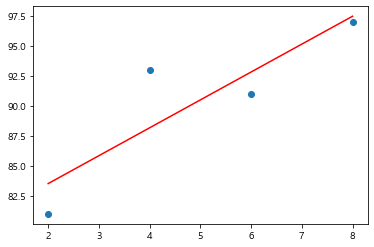

In [63]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2,4,6,8])
y = np.array([81, 93, 91, 97])

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다.
model.add(Dense(1, input_dim = 1, activation = 'linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해
# 평균 제곰 오차(mse)를 사용합니다.
model.compile(optimizer='sgd', loss = 'mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs = 2000)

plt.scatter(x ,y)
plt.plot(x,model.predict(x),'r')        # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [65]:
# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7 
prediction = model.predict([hour])
print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다."% (hour,prediction))

1/1 [==============================] - 0s 22ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.
